## Extended Data Figure 12

![title](../assets/EDFig12.png)

In [1]:
%load_ext autoreload
%autoreload 2
import sys
import logging
from tqdm import tqdm
from pathlib import Path

sys.path.insert(0, "./prepare_data/")

import yaml
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import Figure4_neurons as neurons
import Figure5_prepare_data as prepare_data
import connectome_utils
# import Figure4_graph_tools as graph_tools
# import Figure4_generate_grooming_nets_monosynaptic as gen_network
from common import *

# import plot_utils

DATA_PATH = Path(
    "../data"
)
EXPORT_PATH = Path(
    "../results/EDFigure12"
)
EXPORT_PATH.mkdir(exist_ok=True, parents=True)


FIGSIZE = {'width': 1.2, 'length': 0.9}

# disable matplotlib logger
logging.getLogger("matplotlib.font_manager").disabled = True

neuron_index = list(np.load(DATA_PATH / "neuron_names_ordered.npy")) # ordered neuron names


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Panel A: neural response if the original (left) and symmetrized (right) connectome network to symmetric JO-F input, quantified by Unilateral Selectivity Index.

In [2]:
# Load data
sym_input_response_orig = load_data(DATA_PATH / "EDFig12_org_network_JO-F_L_3_R_3.pkl")
seed_numbers = list(sym_input_response_orig.keys())

# Antennal grooming neurons to look at
neuron_types = ["ABN", "ADN", "ANTEN_MN"]
left_neurons = [
    i
    for i, name in enumerate(neuron_index)
    for neuron_type in neuron_types
    if neuron_type in name and "L" in name
]
right_neurons = [
    i
    for i, name in enumerate(neuron_index)
    for neuron_type in neuron_types
    if neuron_type in name and "R" in name
]

# Format names
neuron_names = [neuron_index[i][:-2].replace('ANTEN_','A').replace('_','-') for i in left_neurons]

# Compute unilateral selectivity index
orig_sym_response_USI = prepare_data.get_act_difference(
    sym_input_response_orig,
    seed_numbers,
    left_neurons=left_neurons,
    right_neurons=right_neurons,
    start=2500,
    end=4500,
    filter=True
)


/Users/ozdil/Desktop/PhD/Manuscripts/TRIPATITE_2023/antennal-grooming/src/./prepare_data/Figure5_prepare_data.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ratio = (right_area[0] - left_area[0]) / (right_area[0] + left_area[0])


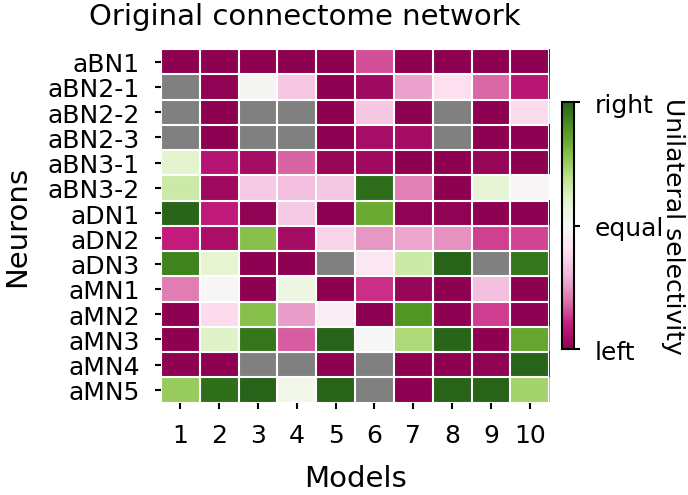

In [3]:
with plt.style.context("./config.mplstyle"):
    fig, ax = plt.subplots(figsize=(FIGSIZE["width"] * 4.5, FIGSIZE["length"] * 1.7), dpi=300)

    cmap = mpl.colormaps.get_cmap("PiYG")
    cmap.set_bad(color="#808080")

    cax = ax.imshow(orig_sym_response_USI.T, cmap=cmap, aspect=0.65, vmin=-1, vmax=1)

    # Add grid lines between cells
    ax.set_xticks(np.arange(-0.5, orig_sym_response_USI.shape[0], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, orig_sym_response_USI.shape[1], 1), minor=True)
    ax.grid(which="minor", color="white", linestyle="-", linewidth=0.5)
    ax.tick_params(which="minor", size=0.0)
    ax.grid(False)

    # Add a color bar (legend) for the heatmap
    cbar = fig.colorbar(cax, ax=ax, shrink=0.7, pad=0.01)
    cbar.set_label("Unilateral selectivity", rotation=270, labelpad=5)
    cbar.set_ticks([-1, 0, 1])
    cbar.set_ticklabels(["left", "equal", "right"])

    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    ax.set_xticks(np.arange(len(seed_numbers)), labels=np.arange(1, len(seed_numbers) + 1), rotation=0)
    ax.set_xlabel("Models", fontsize=7)
    ax.set_ylabel("Neurons", fontsize=7)
    neurons_names_updated = [name.replace('A','a') for name in neuron_names]
    ax.set_yticks(np.arange(len(neuron_names)), labels=neurons_names_updated)

    ax.set_title("Original connectome network", x=0.37)
    # Show the plot
    fig.savefig(
        EXPORT_PATH / f"EDFigure12_panelA_left.png",
        bbox_inches="tight",
        dpi=300,
    )
    plt.show()

In [4]:
# nan to number
neuron_dist_orig = {}

for neuron_id, neuron_name in enumerate(neuron_names):
    neuron_dist_orig[neuron_name] = list(orig_sym_response_USI[
        ~np.isnan(orig_sym_response_USI[:, neuron_id]), neuron_id
    ])

In [5]:
# Load data
sym_input_response = load_data(DATA_PATH / "EDFig12_sym_network_JO-F_L_3_R_3.pkl")
seed_numbers = list(sym_input_response.keys())

# Compute unilateral selectivity index
sym_response_USI = prepare_data.get_act_difference(
    sym_input_response,
    seed_numbers,
    left_neurons=left_neurons,
    right_neurons=right_neurons,
    start=2500,
    end=4500,
    filter=True
)


/Users/ozdil/Desktop/PhD/Manuscripts/TRIPATITE_2023/antennal-grooming/src/./prepare_data/Figure5_prepare_data.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ratio = (right_area[0] - left_area[0]) / (right_area[0] + left_area[0])


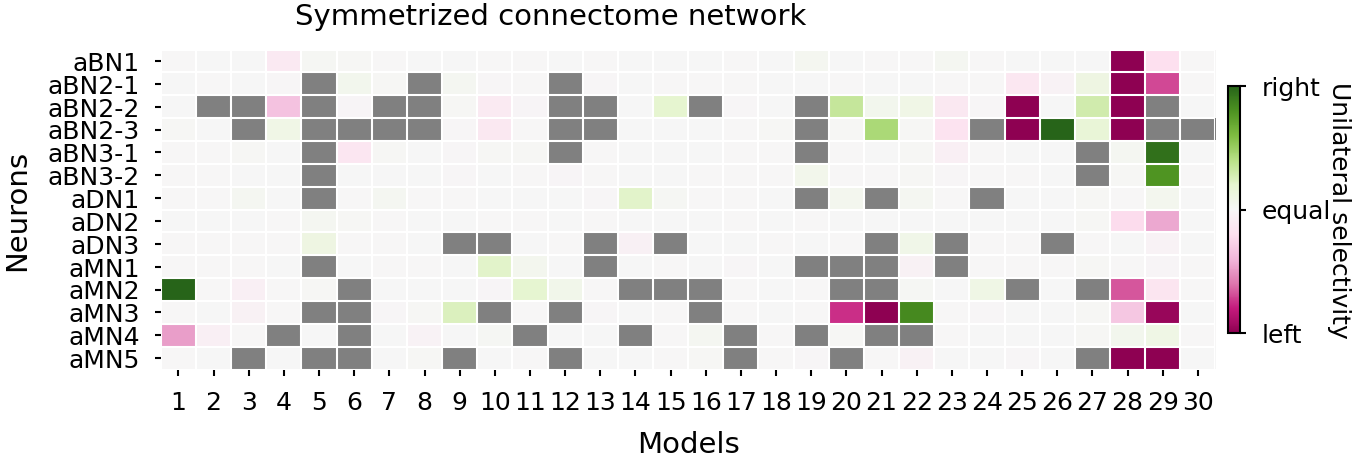

In [6]:
with plt.style.context("./config.mplstyle"):
    fig, ax = plt.subplots(figsize=(FIGSIZE["width"] * 4.5, FIGSIZE["length"] * 1.7), dpi=300)

    cmap = mpl.colormaps.get_cmap("PiYG")
    cmap.set_bad(color="#808080")

    cax = ax.imshow(sym_response_USI.T, cmap=cmap, aspect=0.65, vmin=-1, vmax=1)

    # Add grid lines between cells
    ax.set_xticks(np.arange(-0.5, sym_response_USI.shape[0], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, sym_response_USI.shape[1], 1), minor=True)
    ax.grid(which="minor", color="white", linestyle="-", linewidth=0.5)
    ax.tick_params(which="minor", size=0.0)
    ax.grid(False)

    # Add a color bar (legend) for the heatmap
    cbar = fig.colorbar(cax, ax=ax, shrink=0.7, pad=0.01)
    cbar.set_label("Unilateral selectivity", rotation=270, labelpad=5)
    cbar.set_ticks([-1, 0, 1])
    cbar.set_ticklabels(["left", "equal", "right"])

    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    ax.set_xticks(np.arange(len(seed_numbers)), labels=np.arange(1, len(seed_numbers) + 1), rotation=0)
    ax.set_xlabel("Models", fontsize=7)
    ax.set_ylabel("Neurons", fontsize=7)
    neurons_names_updated = [name.replace('A','a') for name in neuron_names]
    ax.set_yticks(np.arange(len(neuron_names)), labels=neurons_names_updated)

    ax.set_title("Symmetrized connectome network", x=0.37)
    # Show the plot
    fig.savefig(
        EXPORT_PATH / f"EDFigure12_panelA_right.png",
        bbox_inches="tight",
        dpi=300,
    )
    plt.show()

In [7]:
# nan to number
neuron_dist_sym = {}

for neuron_id, neuron_name in enumerate(neuron_names):
    neuron_dist_sym[neuron_name] = list(sym_response_USI[
        ~np.isnan(sym_response_USI[:, neuron_id]), neuron_id
    ])

## Panel B: distribution of USI values

In [8]:
neuron_names = ["AMN1", "AMN2", "AMN3", "AMN4", "AMN5"]
# Put together
sym_original_dict = {}
for neuron in neuron_names:
    sym_original_dict[neuron + "_sym"] = neuron_dist_sym[neuron]
    sym_original_dict[neuron + "_org"] = neuron_dist_orig[neuron]

/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_54629/3518712076.py:10: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


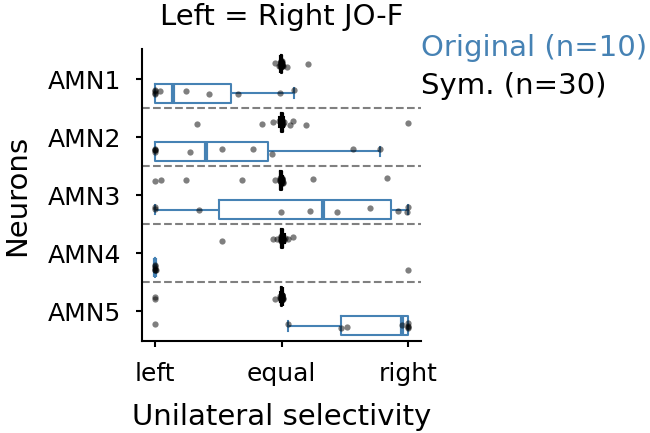

In [10]:
with plt.style.context("./config.mplstyle"):

    fig, ax = plt.subplots(
        figsize=(FIGSIZE["width"] * 1, FIGSIZE["length"] * 1.4), dpi=300
    )

    # sort keys and values together
    sorted_keys, sorted_vals = zip(*sym_original_dict.items())

    sns.boxplot(
        data=sorted_vals,
        orient="h",
        ax=ax,
        showfliers=False,
        width=0.65,
        palette=["black", "steelblue"],
        fill=False,
        linewidth=0.5,
        medianprops=dict(linewidth=1),
    )

    sns.stripplot(
        data=sorted_vals, size=1.5, color="black", orient="h", linewidth=0, alpha=0.5
    )

    ax.set_xlabel("Unilateral selectivity", fontsize=7)
    ax.set_ylabel("Neurons", fontsize=7)
    ax.set_yticks(np.arange(0.5, len(neuron_names) * 2, 2), labels=neuron_names)

    ax.set_xticks([-1,0,1], labels=["left", "equal", "right"])
    ax.set_title(f"Left = Right JO-F")

    ax.axhline(1.5, ls="--", lw=0.5, color="grey")
    ax.axhline(3.5, ls="--", lw=0.5, color="grey")
    ax.axhline(5.5, ls="--", lw=0.5, color="grey")
    ax.axhline(7.5, ls="--", lw=0.5, color="grey")

    ax.text(1.1, 1, "Sym. (n=30)", color="black")
    ax.text(1.1, -0.3, "Original (n=10)", color="steelblue")
    fig.savefig(
        EXPORT_PATH / f"EDFig12_panelB.png",
        bbox_inches="tight",
        dpi=300,
    )
    plt.show()